# Data Analytics Job Market
## Participants: Anvita Iyer, Brian Hester, Crystal Gonzales, Emeka Osaseh, Sam Williamson
### Data Source: Kaggle



In [12]:
# Data Analysis Job Market 

In [90]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import matplotlib.pyplot as plt

In [91]:
#Import csv file
csv_path = Path('Salaries_with_job_categories.csv')

# Read the CSV into a Pandas DataFrame
data_analysis_df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print("Loaded Salaries_with_job_categories.csv:")
data_analysis_df.head()

Loaded Salaries_with_job_categories.csv:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job_Category
0,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M,Other
1,2023,EN,FT,Data DevOps Engineer,44382,EUR,47918,NL,50,NL,L,Data Engineer
2,2024,EN,FT,Data Analyst,40100,EUR,44555,LT,0,LT,M,Data Analyst
3,2024,EN,FT,Data Analyst,28069,EUR,31187,LT,0,LT,M,Data Analyst
4,2024,SE,FT,Data Engineer,220000,USD,220000,US,0,US,M,Data Engineer


In [92]:
# Load and inspect the country-region mapping file
country_region_path = Path('all_country_and_continent_codes.csv')
country_region_df = pd.read_csv(country_region_path)

# Display the first few rows
print("Country-Region Mapping File:")
print(country_region_df.head())

Country-Region Mapping File:
             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN

In [93]:
# Check unique country codes in both datasets
print("Unique country codes in salary dataset:")
print(data_analysis_df['employee_residence'].unique())

print("Unique country codes in region mapping dataset:")
print(country_region_df['alpha-2'].unique())


Unique country codes in salary dataset:
['CA' 'NL' 'LT' 'US' 'EG' 'AT' 'AU' 'DE' 'GB' 'ES' 'PH' 'FI' 'TR' 'CH'
 'OM' 'NZ' 'FR' 'MX' 'PT' 'BA' 'BR' 'AR' 'LV' 'ZA' 'IT' 'IN' 'IE' 'EE'
 'UA' 'MT' 'HR' 'LB' 'RO' 'HU' 'VN' 'NG' 'PL' 'CZ' 'PK' 'UG' 'CO' 'SI'
 'GR' 'MU' 'AM' 'TH' 'KR' 'QA' 'RU' 'KE' 'TN' 'GH' 'BE' 'AD' 'EC' 'PE'
 'MD' 'SA' 'NO' 'UZ' 'GE' 'JP' 'HK' 'CF' 'IL' 'SG' 'SE' 'KW' 'CY' 'IR'
 'AS' 'CN' 'CR' 'CL' 'PR' 'DK' 'BO' 'DO' 'ID' 'AE' 'MY' 'HN' 'DZ' 'IQ'
 'BG' 'JE' 'RS' 'LU']
Unique country codes in region mapping dataset:
['AF' 'AX' 'AL' 'DZ' 'AS' 'AD' 'AO' 'AI' 'AQ' 'AG' 'AR' 'AM' 'AW' 'AU'
 'AT' 'AZ' 'BS' 'BH' 'BD' 'BB' 'BY' 'BE' 'BZ' 'BJ' 'BM' 'BT' 'BO' 'BQ'
 'BA' 'BW' 'BV' 'BR' 'IO' 'BN' 'BG' 'BF' 'BI' 'CV' 'KH' 'CM' 'CA' 'KY'
 'CF' 'TD' 'CL' 'CN' 'CX' 'CC' 'CO' 'KM' 'CG' 'CD' 'CK' 'CR' 'CI' 'HR'
 'CU' 'CW' 'CY' 'CZ' 'DK' 'DJ' 'DM' 'DO' 'EC' 'EG' 'SV' 'GQ' 'ER' 'EE'
 'SZ' 'ET' 'FK' 'FO' 'FJ' 'FI' 'FR' 'GF' 'PF' 'TF' 'GA' 'GM' 'GE' 'DE'
 'GH' 'GI' 'GR' 'GL' 'GD' 'GP' 'GU' 'G

In [94]:
# Check for unmatched country codes in the salary dataset
unmatched_codes = data_analysis_df[~data_analysis_df['employee_residence'].isin(country_region_df['alpha-2'])]
print("Unmatched country codes in the salary dataset:")
print(unmatched_codes['employee_residence'].unique())


Unmatched country codes in the salary dataset:
[]


In [95]:
# Load the country-region mapping file
country_region_path = Path('all_country_and_continent_codes.csv')
country_region_df = pd.read_csv(country_region_path)

# Display the first few rows of the country-region mapping file for verification
print("Country-Region Mapping File:")
country_region_df.head()

# Merge the region data into the salary DataFrame
merged_df = pd.merge(
    data_analysis_df,
    country_region_df[['alpha-2', 'region']],
    left_on='employee_residence',
    right_on='alpha-2',
    how='left'
)

# Drop the redundant alpha-2 column
merged_df.drop(columns=['alpha-2'], inplace=True)

# Display the updated DataFrame with the region column
print("Merged DataFrame with Regions:")
print(merged_df.head())

# Save the updated DataFrame to a new CSV file
output_file_with_region = Path('Salaries_with_job_categories_and_regions.csv')
merged_df.to_csv(output_file_with_region, index=False)

print(f"Updated file with regions saved to: {output_file_with_region}")


Country-Region Mapping File:
Merged DataFrame with Regions:
   work_year experience_level employment_type             job_title  salary  \
0       2024               MI              FT          AI Architect  800000   
1       2023               EN              FT  Data DevOps Engineer   44382   
2       2024               EN              FT          Data Analyst   40100   
3       2024               EN              FT          Data Analyst   28069   
4       2024               SE              FT         Data Engineer  220000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD         800000                 CA           100   
1             EUR          47918                 NL            50   
2             EUR          44555                 LT             0   
3             EUR          31187                 LT             0   
4             USD         220000                 US             0   

  company_location company_size   Job_Category    

In [96]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title = title.lower()
    if "engineer" in title and "machine learning" not in title and "cloud" not in title:
        return "Data Engineer"
    elif "scientist" in title and "data" in title:
        return "Data Scientist"
    elif "analyst" in title:
        return "Data Analyst"
    elif "machine learning" in title or "ml" in title:
        return "Machine Learning Engineer"
    elif "research" in title or "scientist" in title:
        return "Research Scientist"
    elif "business intelligence" in title or "bi" in title:
        return "Business Intelligence"
    elif "cloud" in title or "software" in title:
        return "Cloud/Software Engineer"
    else:
        return "Other"

# Apply the function to categorize job titles
merged_df['Job_Category'] = merged_df['job_title'].apply(categorize_job_title)

# Save the updated DataFrame to a new CSV file
output_file = Path("Salaries_with_job_categories_and_regions.csv")
merged_df.to_csv(output_file, index=False)

print(f"Updated file saved to: {output_file}")

Updated file saved to: Salaries_with_job_categories_and_regions.csv


In [97]:
# Create a Dataframe
data_analysis_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job_Category
0,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M,Other
1,2023,EN,FT,Data DevOps Engineer,44382,EUR,47918,NL,50,NL,L,Data Engineer
2,2024,EN,FT,Data Analyst,40100,EUR,44555,LT,0,LT,M,Data Analyst
3,2024,EN,FT,Data Analyst,28069,EUR,31187,LT,0,LT,M,Data Analyst
4,2024,SE,FT,Data Engineer,220000,USD,220000,US,0,US,M,Data Engineer


In [100]:
print(data_analysis_df['Job_Category'].value_counts())

Job_Category
Data Engineer                4287
Data Scientist               2857
Data Analyst                 2425
Machine Learning Engineer    1680
Other                        1433
Research Scientist            855
Business Intelligence         183
Cloud/Software Engineer        10
Name: count, dtype: int64


In [101]:
# Rename Columns
data_renamed_df = data_analysis_df.rename(columns={'salary_in_usd':'salary', 'remote_ratio':'workplace_type'})

In [102]:
# Rename data within columns for clarity
type_replacements = {'CT': 'Contract', 'FT': 'Full Time', 'PT': 'Part Time', 'FL': 'Freelance'}
data_renamed_df['employment_type'] = data_renamed_df['employment_type'].replace(type_replacements)
workplace_replacements = {0: 'In Person', 50: 'Hybrid', 100: 'Remote'}
data_renamed_df['workplace_type'] = data_renamed_df['workplace_type'].replace(workplace_replacements)
experience_replacements = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
data_renamed_df['experience_level'] = data_renamed_df['experience_level'].replace(experience_replacements)
data_renamed_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary,employee_residence,workplace_type,company_location,company_size,Job_Category
0,2024,Mid,Full Time,AI Architect,800000,USD,800000,CA,Remote,CA,M,Other
1,2023,Entry,Full Time,Data DevOps Engineer,44382,EUR,47918,NL,Hybrid,NL,L,Data Engineer
2,2024,Entry,Full Time,Data Analyst,40100,EUR,44555,LT,In Person,LT,M,Data Analyst
3,2024,Entry,Full Time,Data Analyst,28069,EUR,31187,LT,In Person,LT,M,Data Analyst
4,2024,Senior,Full Time,Data Engineer,220000,USD,220000,US,In Person,US,M,Data Engineer


In [103]:
# Ensure unnecessary columns are dropped
columns_to_drop = ['salary_currency', 'salary']
merged_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

print("Columns after dropping unnecessary ones:")
print(merged_df.columns)


Columns after dropping unnecessary ones:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size', 'Job_Category', 'region'],
      dtype='object')


In [104]:

# Rename columns for clarity
merged_df.rename(columns={
    'salary_in_usd': 'salary',
    'remote_ratio': 'workplace_type'
}, inplace=True)

# Verify the column names after renaming
print("Columns after renaming:")
print(merged_df.columns)

Columns after renaming:
Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'employee_residence', 'workplace_type', 'company_location',
       'company_size', 'Job_Category', 'region'],
      dtype='object')


In [106]:
# Rename data within columns for clarity in merged_df
type_replacements = {'CT': 'Contract', 'FT': 'Full Time', 'PT': 'Part Time', 'FL': 'Freelance'}
merged_df['employment_type'] = merged_df['employment_type'].replace(type_replacements)

workplace_replacements = {0: 'In Person', 50: 'Hybrid', 100: 'Remote'}
merged_df['workplace_type'] = merged_df['workplace_type'].replace(workplace_replacements)

experience_replacements = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
merged_df['experience_level'] = merged_df['experience_level'].replace(experience_replacements)

# Display the updated DataFrame
print("Updated DataFrame after renaming within columns:")
print(merged_df.head())

Updated DataFrame after renaming within columns:
   work_year experience_level employment_type             job_title  salary  \
0       2024              Mid       Full Time          AI Architect  800000   
1       2023            Entry       Full Time  Data DevOps Engineer   47918   
2       2024            Entry       Full Time          Data Analyst   44555   
3       2024            Entry       Full Time          Data Analyst   31187   
4       2024           Senior       Full Time         Data Engineer  220000   

  employee_residence workplace_type company_location company_size  \
0                 CA         Remote               CA            M   
1                 NL         Hybrid               NL            L   
2                 LT      In Person               LT            M   
3                 LT      In Person               LT            M   
4                 US      In Person               US            M   

    Job_Category    region  
0          Other  Americas  
1  

In [108]:
# Save the updated DataFrame to a new CSV file
output_file = Path('Salaries_with_job_categories_and_regions_cleaned.csv')
merged_df.to_csv(output_file, index=False)

print(f"Final cleaned file saved to: {output_file}")

Final cleaned file saved to: Salaries_with_job_categories_and_regions_cleaned.csv


In [ ]:
# Understand the data limitations - columns with blank rows to build visuals and what columns to use 


In [ ]:
# create some graphs and bargraphs, etc....salaries, 


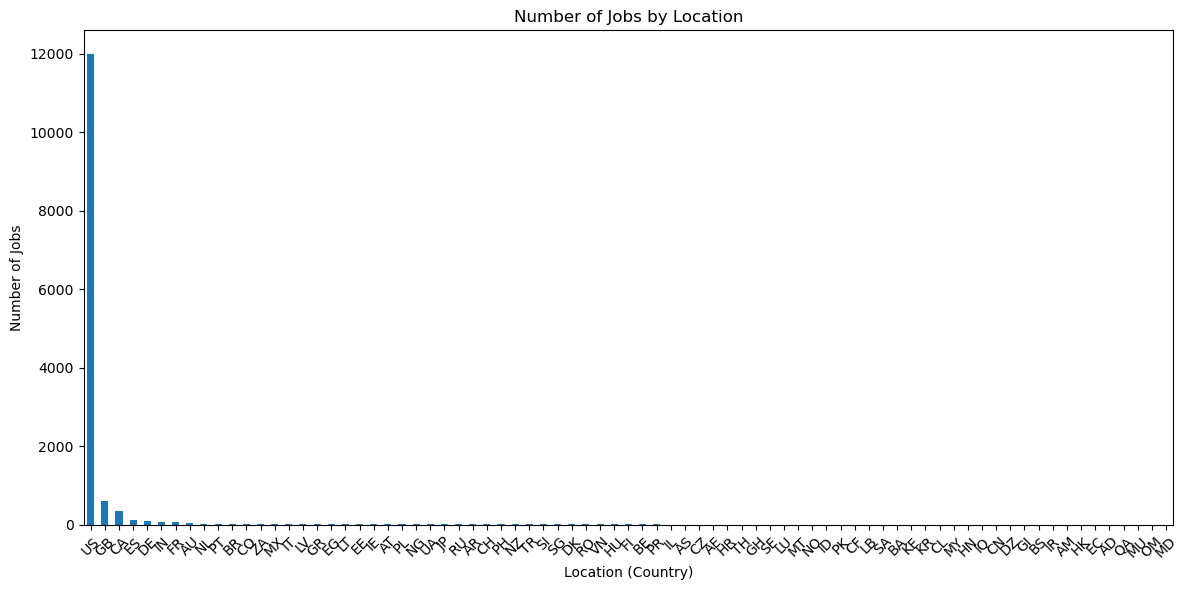

In [7]:
# jobs by location 
job_counts_by_location = data_analysis_df['company_location'].value_counts()
plt.figure(figsize=(12, 6))
job_counts_by_location.plot(kind='bar')
plt.title('Number of Jobs by Location')
plt.xlabel('Location (Country)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

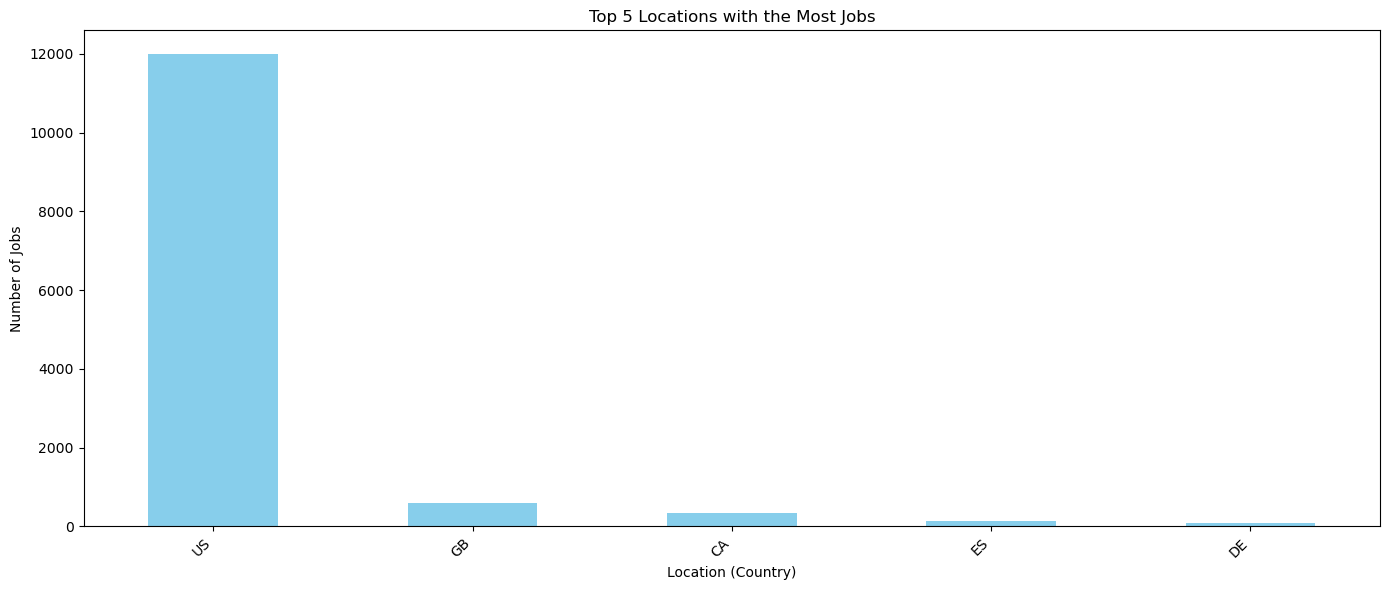

In [8]:
# jobs by location for top 5 countries

top_locations = data_analysis_df['company_location'].value_counts().head(5)

plt.figure(figsize=(14, 6))  # Increase figure width for readability
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 5 Locations with the Most Jobs')
plt.xlabel('Location (Country)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

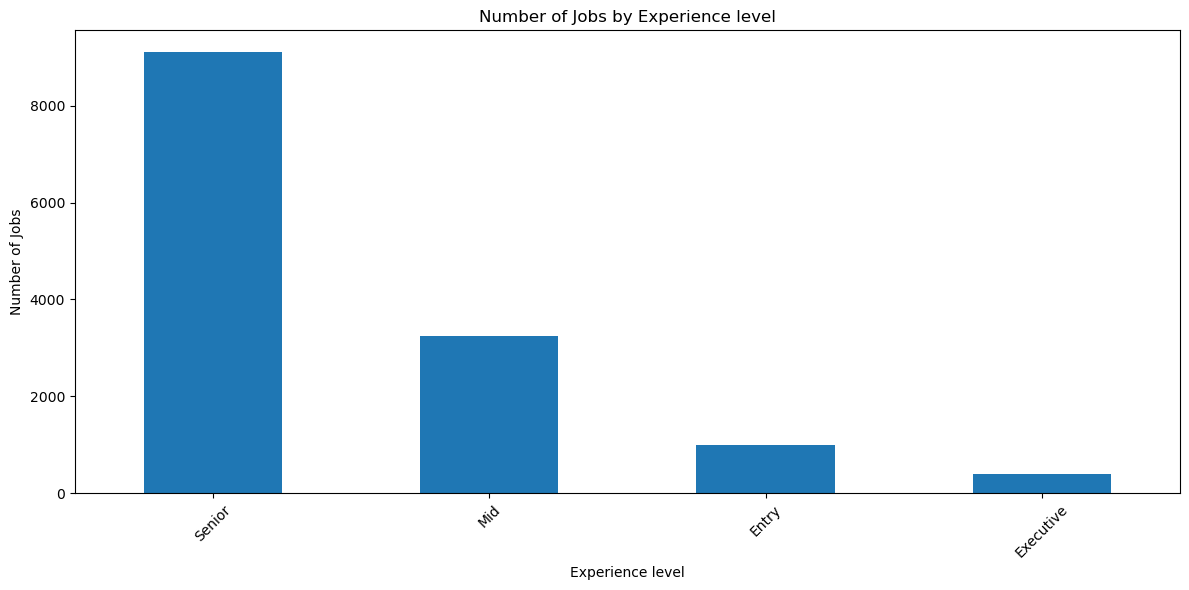

In [12]:
#jobs by level 
job_counts_by_experience = data_renamed_df['experience_level'].value_counts()
plt.figure(figsize=(12, 6))
job_counts_by_experience.plot(kind='bar')
plt.title('Number of Jobs by Experience level')
plt.xlabel('Experience level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()

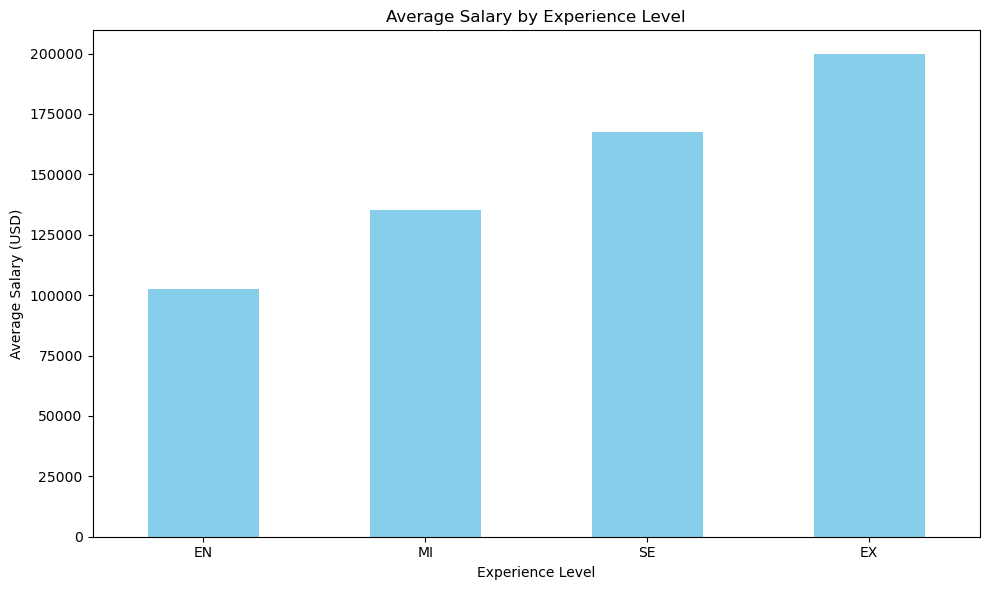

In [13]:
#jobs by level and salary in the US 
us_data = data_analysis_df[data_analysis_df['company_location'] == 'US']

average_salary_by_experience = us_data.groupby('experience_level')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary_by_experience.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

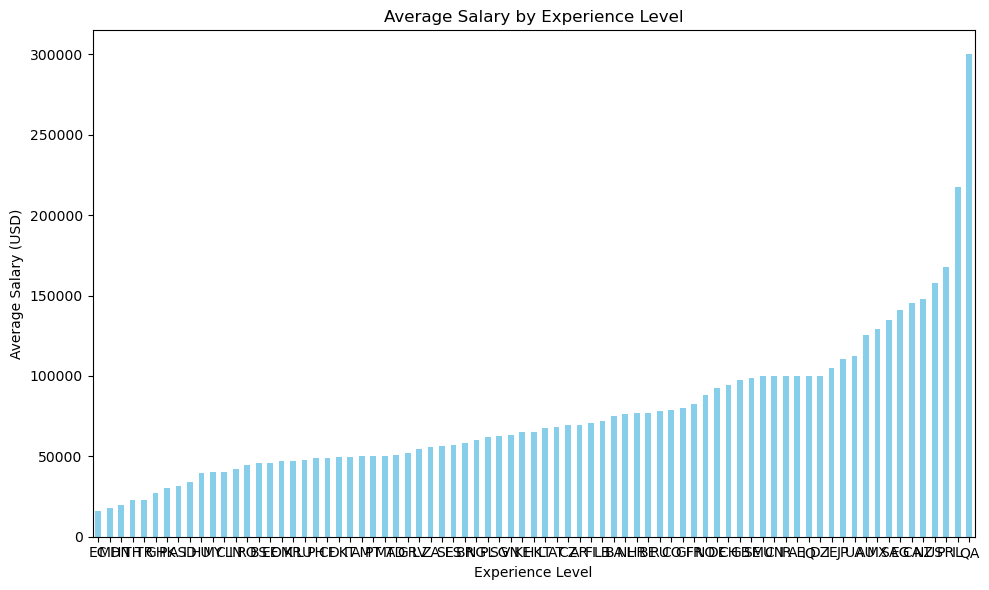

In [15]:
#average salary by location 

average_salary_by_location = data_analysis_df.groupby('company_location')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary_by_location.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

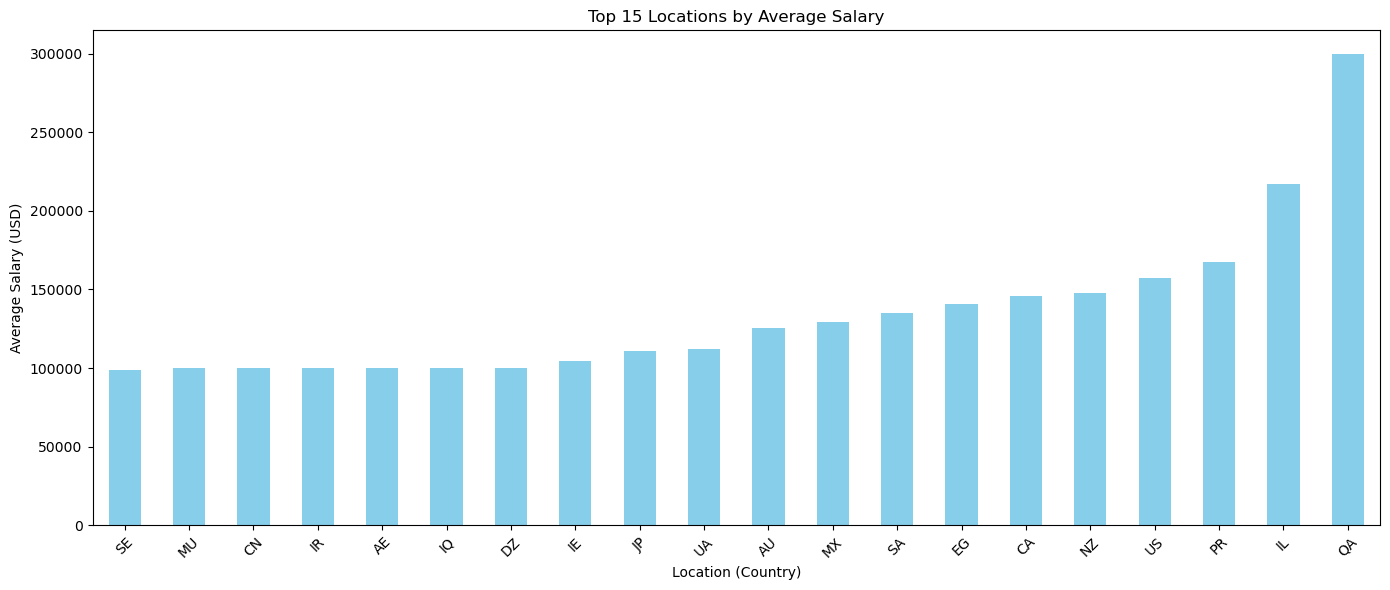

In [16]:
#average salary by location for top 20 
top_salary_locations = average_salary_by_location.tail(20)

plt.figure(figsize=(14, 6))  # Increase figure width
top_salary_locations.plot(kind='bar', color='skyblue')
plt.title('Top 15 Locations by Average Salary')
plt.xlabel('Location (Country)')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()

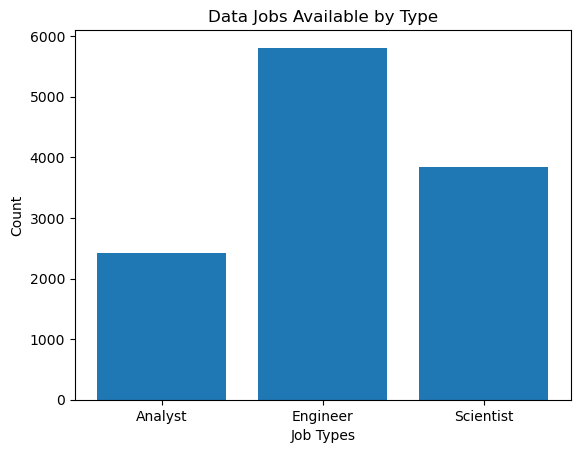

In [18]:
# Graph by Job type
# Filter for jobs containing 'Analyst', 'Engineer', and 'Scientist'
analyst_jobs = data_renamed_df[data_renamed_df['job_title'].str.contains('Analyst', case=False)]
engineer_jobs = data_renamed_df[data_renamed_df['job_title'].str.contains('Engineer', case=False)]
scientist_jobs = data_renamed_df[data_renamed_df['job_title'].str.contains('Scientist', case=False)]

# Count the number of jobs in each category
analyst_count = len(analyst_jobs)
engineer_count = len(engineer_jobs)
scientist_count = len(scientist_jobs)

# Create a list of job titles and their respective counts
job_titles = ['Analyst', 'Engineer', 'Scientist']
job_counts = [analyst_count, engineer_count, scientist_count]

# Create a bar chart
plt.bar(job_titles, job_counts)
plt.xlabel('Job Types')
plt.ylabel('Count')
plt.title('Data Jobs Available by Type')
plt.show()

In [ ]:
#Resave the file as json 

In [ ]:
#Visuals in json 

In [ ]:
# Create a leaflet map to show locattions with markers. 
#Geographical Analysis: Visualizing popular job locations for data science roles.
